**IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error

**IMPORT DATA**

In [2]:
path_dataset = "/content/simplelinearregression.csv"

In [3]:
data = pd.read_csv("simplelinearregression.csv")

In [4]:
data.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      7 non-null      int64
 1   Premium  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [6]:
# View descriptive statistics
print(data.describe())

             Age       Premium
count   7.000000      7.000000
mean   25.857143  20214.285714
std     5.273474   6283.955382
min    18.000000  10000.000000
25%    22.500000  16500.000000
50%    26.000000  21000.000000
75%    29.500000  25250.000000
max    33.000000  27000.000000


In [7]:
data.isnull().sum()

Age        0
Premium    0
dtype: int64

In [8]:
print("Number of duplicated data: {}". format(data.duplicated().sum()))

Number of duplicated data: 0


In [9]:
def missing_value(data):
    for col in data.columns.tolist():
        print('Missing values percentage of {}: {}%'.format(col, data[col].isnull().sum()/len(data[col])))
missing_value(data)

Missing values percentage of Age: 0.0%
Missing values percentage of Premium: 0.0%


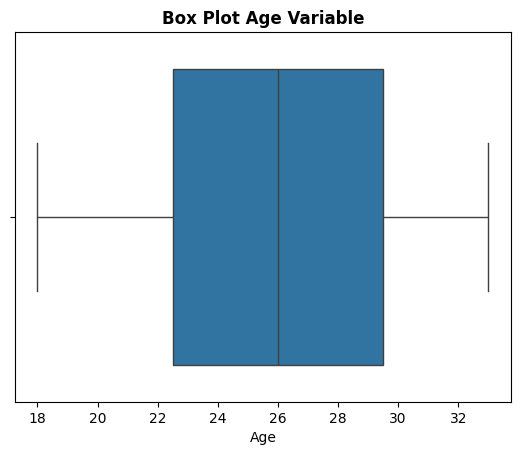

In [10]:
sns.boxplot(x = data['Age'])
plt.title("Box Plot Age Variable", weight='bold')
plt.show()

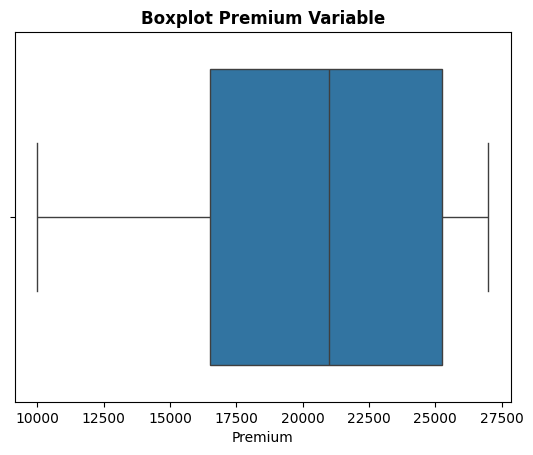

In [11]:
sns.boxplot(x = data['Premium'])
plt.title("Boxplot Premium Variable", weight='bold')
plt.show()

**EDA**

<ipython-input-12-0001a3560d84>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Premium'])


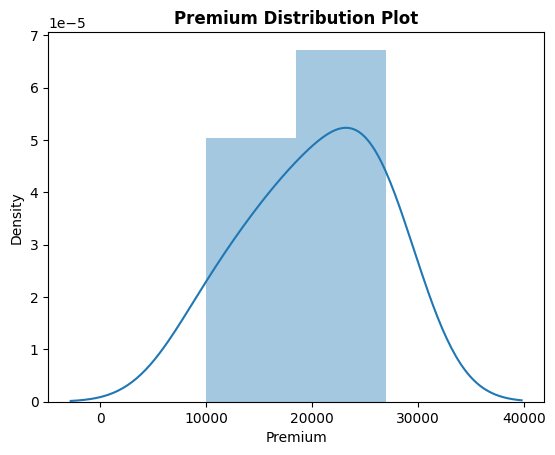

In [12]:
sns.distplot(data['Premium'])
plt.title('Premium Distribution Plot',weight ='bold')
plt.show()

<ipython-input-13-07f2065bece6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


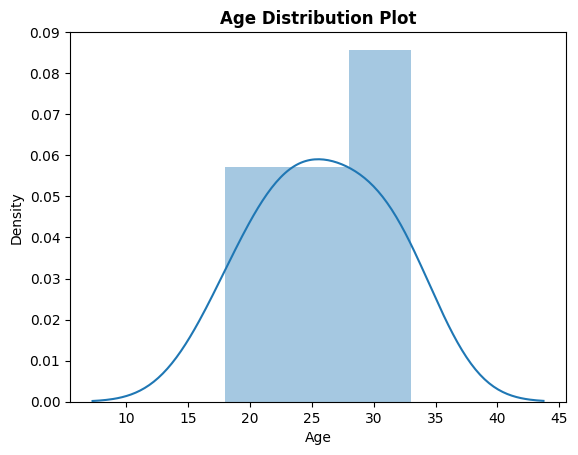

In [13]:
sns.distplot(data['Age'])
plt.title('Age Distribution Plot',weight ='bold')
plt.show()

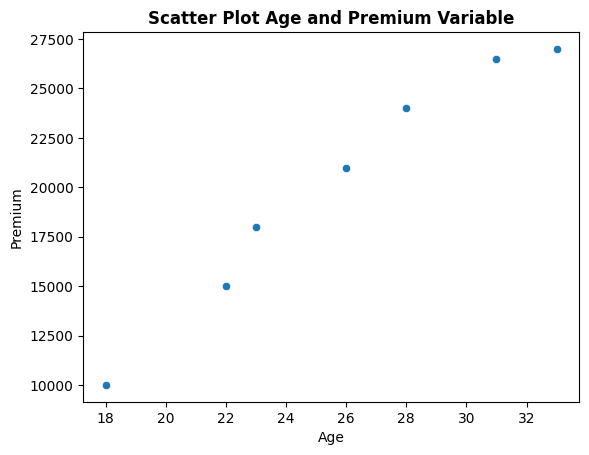

In [14]:
sns.scatterplot(x='Age', y='Premium', data=data)
plt.title("Scatter Plot Age and Premium Variable", weight='bold')
plt.show()

**UJI ASUMSI**

In [15]:
# getting dependent and independent variables
X = data.drop(['Premium'], axis = 1)
y = data['Premium']

#import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression

#Call the regressor
reg = LinearRegression()
reg.fit(X, y)

#Apply the regressor
y_pred = reg.predict(X)

In [16]:
residuals = y.values-y_pred

In [17]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 1.1206059627988172), ('p-value', 0.4330462690972617)]

<ipython-input-18-e9f5d8975676>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


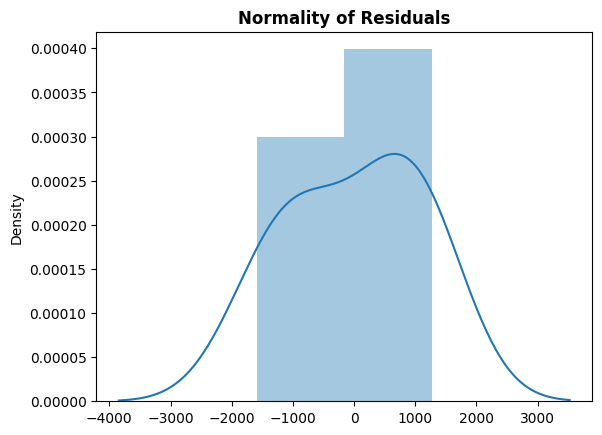

In [18]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of Residuals', weight='bold')

In [19]:
from scipy.stats import shapiro
np.random.seed(1)
shapiro(residuals)

ShapiroResult(statistic=0.9294930696487427, pvalue=0.5465962290763855)

Normalitas

Ho : berdistribusi normal
H1 : tidak berdistribusi normal

Independen

In [20]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,7.158398,0.209124


**MODELLING**

In [21]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Call the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg = reg.fit(X_train, y_train)

# Apply the regressor/model to the test data
y_pred = reg.predict(X_test)

In [22]:
#Linear Regression Slope and Intercept
print("Model intercept, a:" , reg.coef_[0])
print("Model slope, b:" , reg.intercept_)

Model intercept, a: 1317.3076923076926
Model slope, b: -13632.692307692312


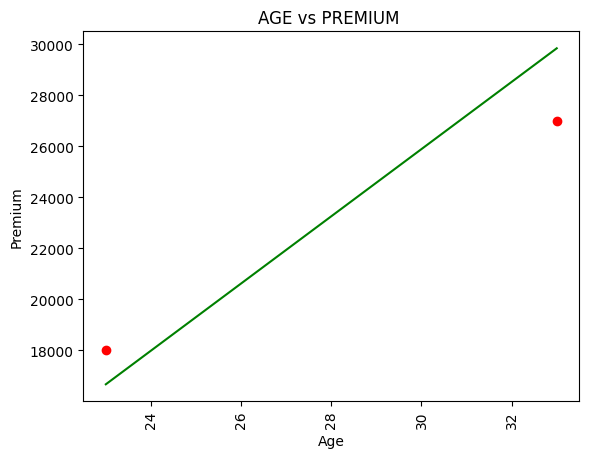

In [23]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, y_pred, color = "green")
plt.title("AGE vs PREMIUM ")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.xticks(rotation=90)
plt.show()

In [24]:
# Calculate and print r2_score
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.7571


In [25]:
# Calculate and print Root Mean Square Error(RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE Value: {:.4f}".format(rmse))

RMSE Value: 2217.8889


**PREDICTION**

In [26]:
#Prediction Data
DataPrediksi=data[['Age']]
DataPrediksi['Premium_Prediction']=reg.coef_[0]+  reg.intercept_*DataPrediksi['Age']
DataPrediksi

,Age,Premium_Prediction
0,18,-244071.153846
1,22,-298601.923077
2,23,-312234.615385
3,26,-353132.692308
4,28,-380398.076923
5,31,-421296.153846
6,33,-448561.538462
